In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from data_columns import childhood, demographic, diagnosis, all
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import umap.umap_ as umap
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

import warnings
warnings.filterwarnings("ignore")

In [3]:
init_df = pd.read_csv('./data/mental-health-comorbidity-raw.csv')
init_df.shape

(5001, 1000)

In [4]:
df = init_df[all()].copy()
df = df.replace(-9, np.nan)
df = df.dropna()
df.shape

(4959, 122)

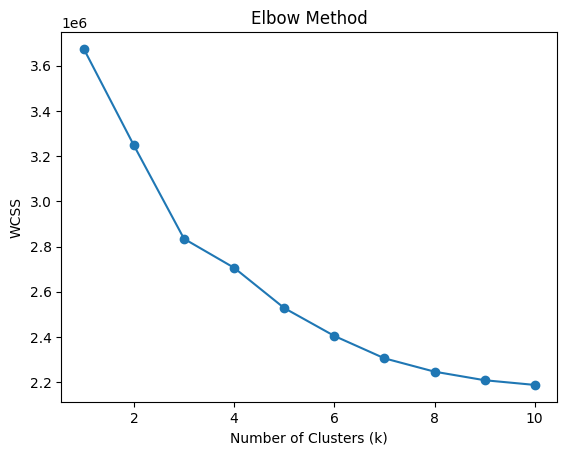

In [41]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_) # Within-Cluster Sum of Squares

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

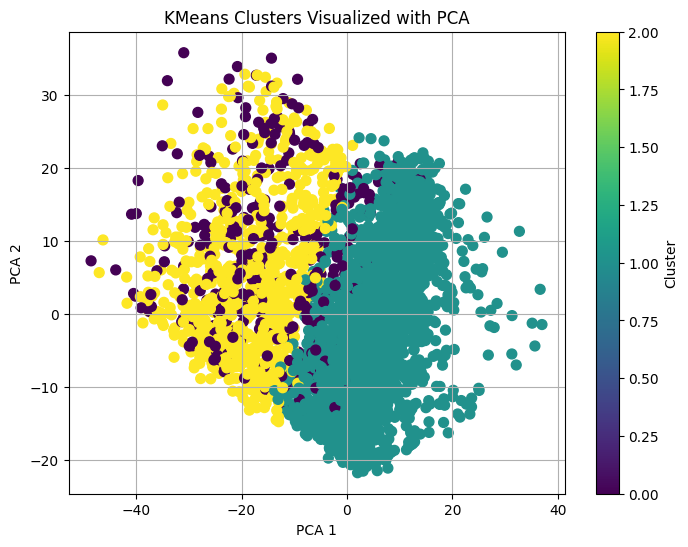

In [40]:
kmeans_df = df.copy()
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_df['cluster'] = kmeans.fit_predict(kmeans_df)

pca = PCA(n_components=2)
components = pca.fit_transform(kmeans_df.drop('cluster', axis=1))
kmeans_df['pca1'] = components[:, 0]
kmeans_df['pca2'] = components[:, 1]

plt.figure(figsize=(8, 6))
scatter = plt.scatter(kmeans_df['pca1'], kmeans_df['pca2'], c=kmeans_df['cluster'], cmap='viridis', s=50)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("KMeans Clusters Visualized with PCA")
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()

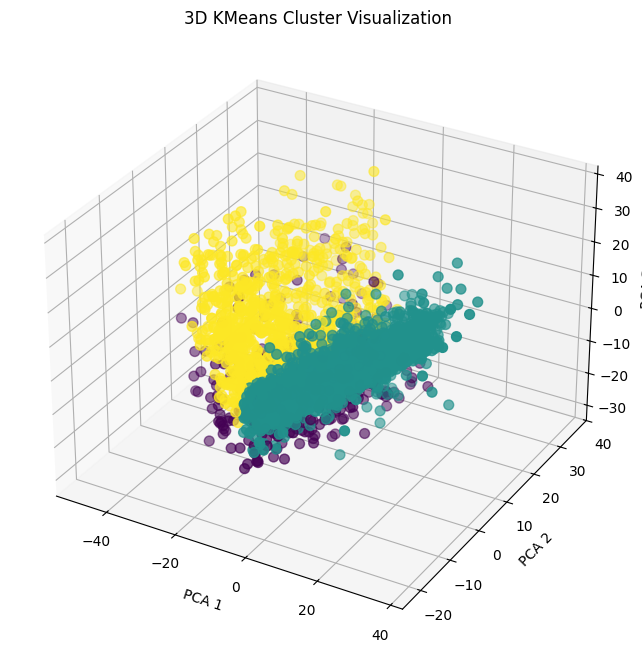

In [ ]:
kmeans_df2 = df.copy()
kmeans2 = KMeans(n_clusters=3, random_state=42)
kmeans_df2['cluster'] = kmeans2.fit_predict(kmeans_df2)

pca = PCA(n_components=3)
components = pca.fit_transform(kmeans_df2.drop('cluster', axis=1))
kmeans_df2['pca1'] = components[:, 0]
kmeans_df2['pca2'] = components[:, 1]
kmeans_df2['pca3'] = components[:, 2]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(kmeans_df2['pca1'], kmeans_df2['pca2'], kmeans_df2['pca3'],
                     c=kmeans_df2['cluster'], cmap='viridis', s=50)

ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
ax.set_title("3D KMeans Cluster Visualization")
plt.show()

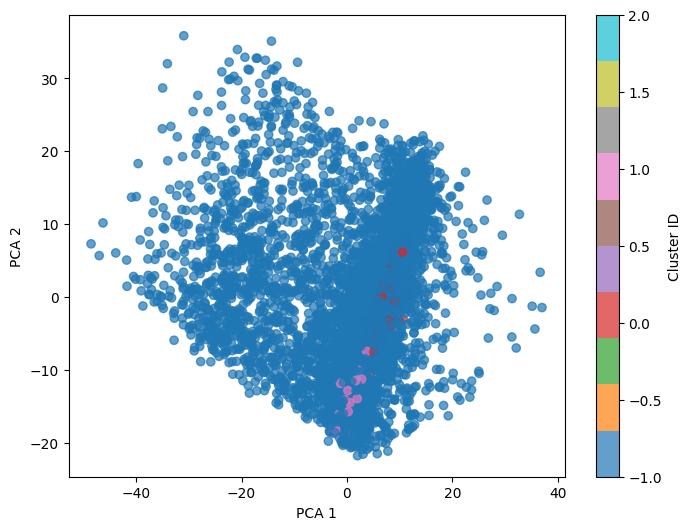

In [ ]:
dbscan_df = df.copy()
dbscan = DBSCAN(eps=7, min_samples=10)
labels_db = dbscan.fit_predict(dbscan_df)

pca = PCA(n_components=2) 
X_pca = pca.fit_transform(dbscan_df)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_db, cmap="tab10", alpha=0.7)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label="Cluster ID")
plt.show()

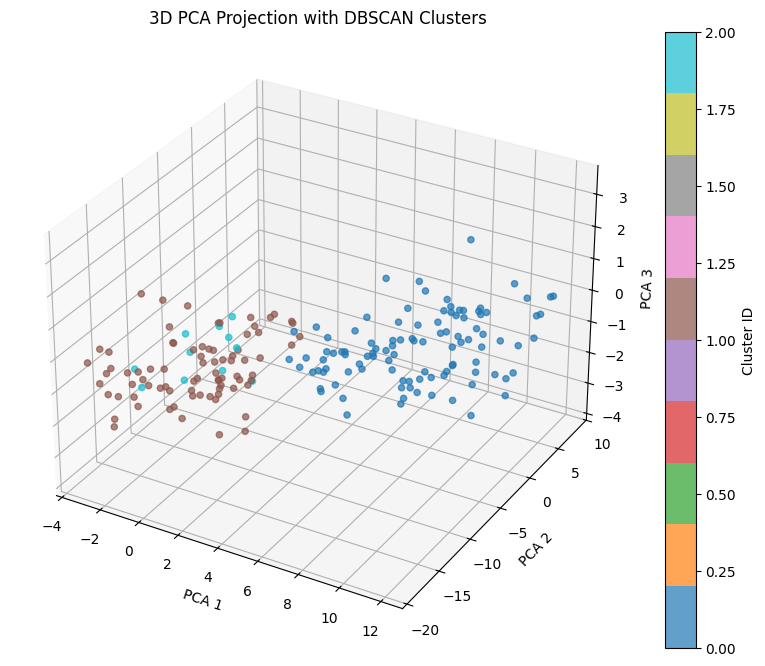

In [59]:
dbscan_df2 = df.copy()
dbscan2 = DBSCAN(eps=7, min_samples=10)
labels_db2 = dbscan2.fit_predict(dbscan_df2)

pca = PCA(n_components=3)
X_pca = pca.fit_transform(dbscan_df2)

mask = labels != -1
X_pca_filtered = X_pca[mask]
labels_filtered = labels[mask]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca_filtered[:, 0], X_pca_filtered[:, 1], X_pca_filtered[:, 2],
                     c=labels_filtered, cmap="tab10", alpha=0.7)

ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
ax.set_title("3D PCA Projection with DBSCAN Clusters")
fig.colorbar(scatter, label="Cluster ID")
plt.show()

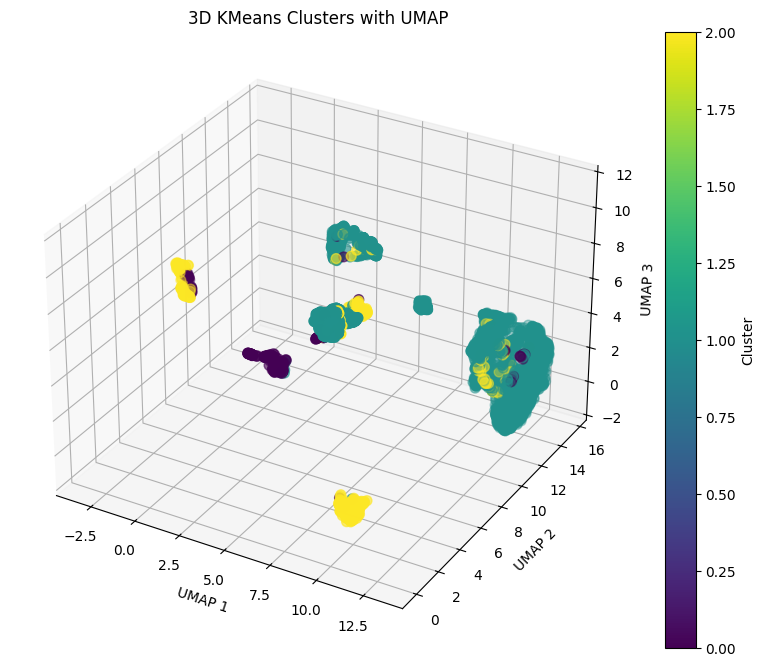

In [ ]:
kmeans3 = KMeans(n_clusters=3, random_state=42)
kmeans_df3['cluster'] = kmeans3.fit_predict(kmeans_df3)

reducer = umap.UMAP(n_components=3, random_state=42)
embedding = reducer.fit_transform(kmeans_df3.drop('cluster', axis=1))
kmeans_df3['umap1'] = embedding[:, 0]
kmeans_df3['umap2'] = embedding[:, 1]
kmeans_df3['umap3'] = embedding[:, 2]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(kmeans_df3['umap1'], kmeans_df3['umap2'], kmeans_df3['umap3'],
                     c=kmeans_df3['cluster'], cmap='viridis', s=50)

ax.set_xlabel("UMAP 1")
ax.set_ylabel("UMAP 2")
ax.set_zlabel("UMAP 3")
ax.set_title("3D KMeans Clusters with UMAP")
fig.colorbar(scatter, ax=ax, label='Cluster')
plt.show()

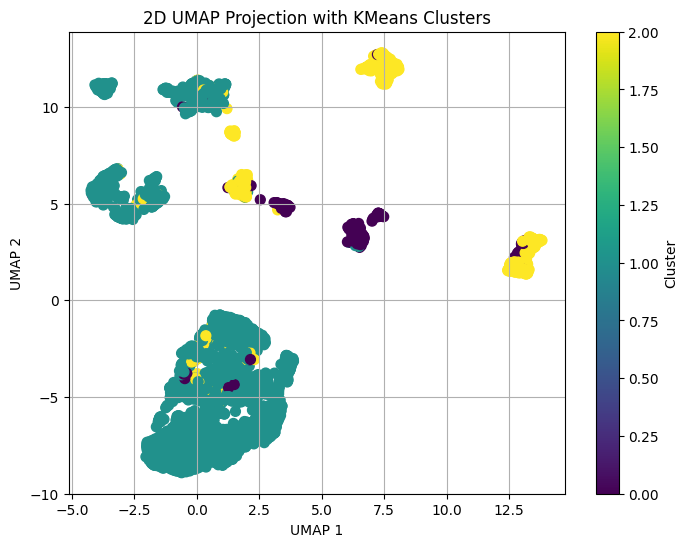

In [43]:
kmeans_df4 = df.copy()
kmeans4 = KMeans(n_clusters=3, random_state=42)
kmeans_df4['cluster'] = kmeans4.fit_predict(kmeans_df4)

# Step 3: Apply UMAP (2D)
reducer = umap.UMAP(n_components=2, random_state=42)
embedding = reducer.fit_transform(kmeans_df4.drop('cluster', axis=1))
kmeans_df4['umap1'] = embedding[:, 0]
kmeans_df4['umap2'] = embedding[:, 1]

# Step 4: Plot the 2D UMAP projection
plt.figure(figsize=(8, 6))
scatter = plt.scatter(kmeans_df4['umap1'], kmeans_df4['umap2'], c=kmeans_df4['cluster'], cmap='viridis', s=50)
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.title("2D UMAP Projection with KMeans Clusters")
plt.colorbar(scatter, label="Cluster")
plt.grid(True)
plt.show()

In [5]:
num_columns = ["HHSIZE","AGE"] + ["CH13","CH14","CH16","CH21","CH22","CH24","CH38","CH43","CH45"]
cat_columns = [col for col in df.columns if col not in num_columns]

X_cluster = df.copy()

preprocessor3 = ColumnTransformer([
    ("num", StandardScaler(), num_columns),
    ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_columns)
])

X_preprocessed = preprocessor3.fit_transform(X_cluster)

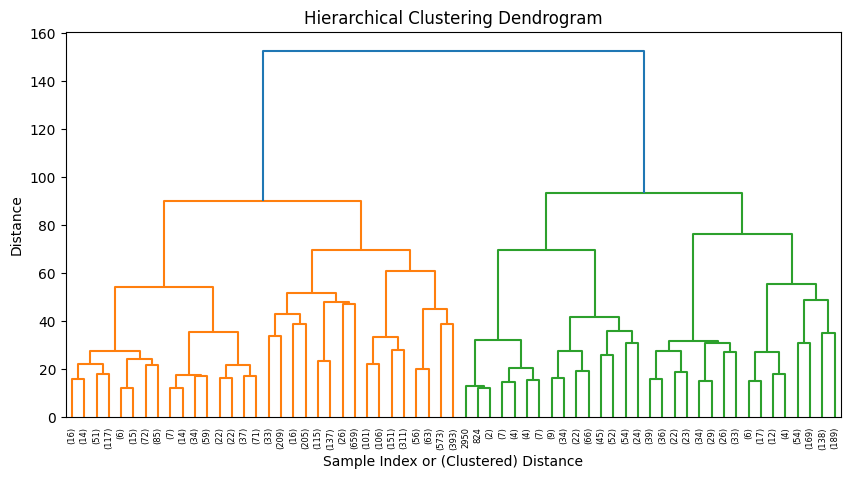

In [55]:
linked = linkage(X_preprocessed, method='ward')

plt.figure(figsize=(10, 5))
dendrogram(linked, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index or (Clustered) Distance")
plt.ylabel("Distance")
plt.show()

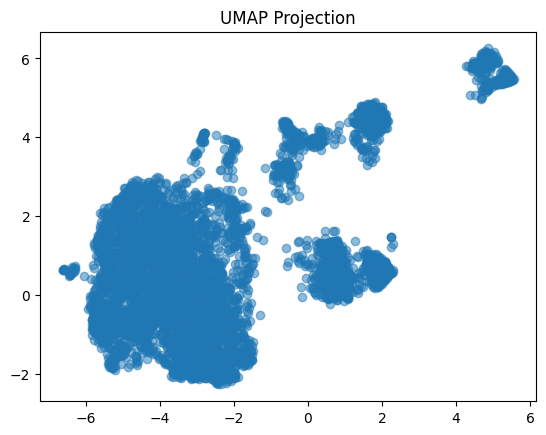

In [6]:
umap_model = umap.UMAP(random_state=42)
X_umap = umap_model.fit_transform(X_preprocessed)

plt.scatter(X_umap[:, 0], X_umap[:, 1], alpha=0.5)
plt.title("UMAP Projection")
plt.show()

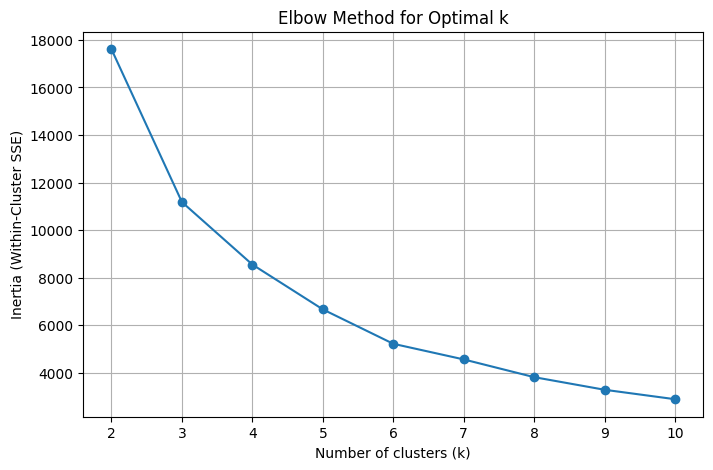

In [49]:
scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_umap)
    scores.append(kmeans.inertia_) # Within-Cluster Sum of Squares

plt.figure(figsize=(8, 5))
plt.plot(k_range, scores, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia (Within-Cluster SSE)")
plt.title("Elbow Method for Optimal k")
plt.grid(True)
plt.show()

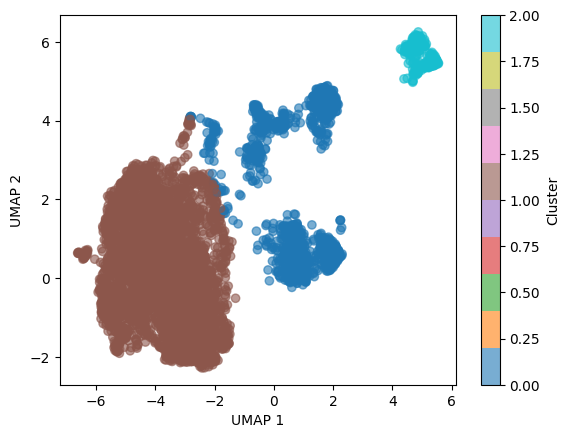

In [45]:
kmeans1 = KMeans(n_clusters=3, random_state=42)
labels1 = kmeans1.fit_predict(X_umap)

plt.scatter(X_umap[:, 0], X_umap[:, 1], c=labels1, cmap='tab10', alpha=0.6)
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.colorbar(label="Cluster")
plt.show()

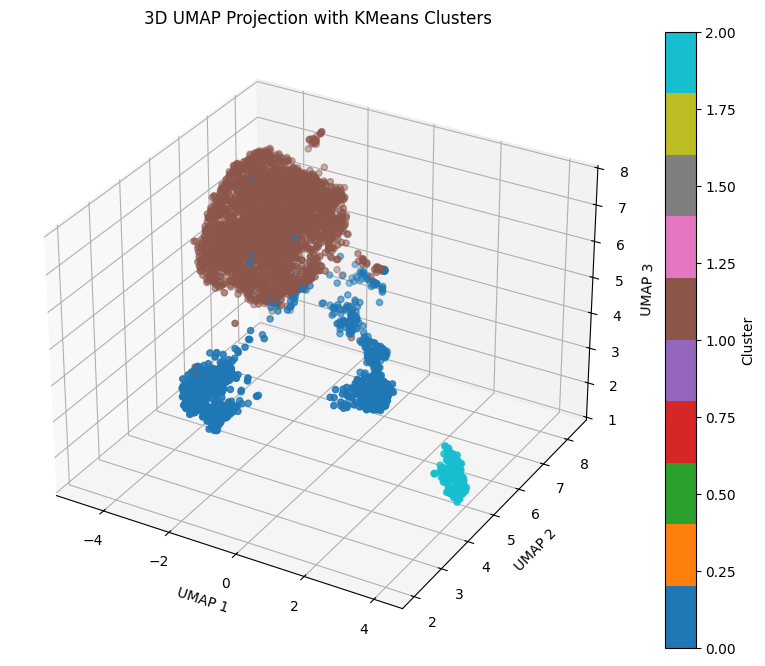

In [52]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_umap[:, 0], X_umap[:, 1], X_umap[:, 2], c=labels1, cmap='tab10')

ax.set_xlabel("UMAP 1")
ax.set_ylabel("UMAP 2")
ax.set_zlabel("UMAP 3")
ax.set_title("3D UMAP Projection with KMeans Clusters")
fig.colorbar(scatter, label="Cluster")
plt.show()

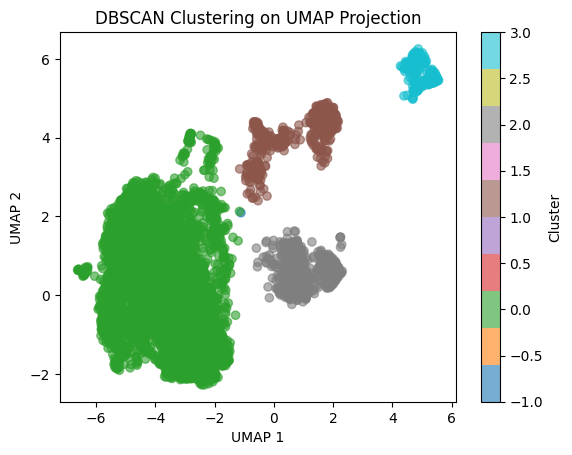

In [9]:
dbscan1 = DBSCAN(eps=.5, min_samples=4)
labels2 = dbscan1.fit_predict(X_umap)

plt.scatter(X_umap[:, 0], X_umap[:, 1], c=labels2, cmap="tab10", alpha=0.6)
plt.title("DBSCAN Clustering on UMAP Projection")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.colorbar(label="Cluster")
plt.show()

In [ ]:
# cluster_df = df. copy()
# cluster_df['cluster'] = labels2
# cluster_df.to_csv('./data/clustering_all_features.csv', index=False)